<img src = 'task5.jpg'>

In [1]:
#Imports

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [12]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(ipl.index[:20])))

In [11]:
ipl = pd.read_csv('matches.csv')
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [13]:
ipl.shape

(756, 18)

In [14]:
ipl.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [163]:
years = ipl.season.unique()
start_year = ipl.season.min()
last_year = ipl.season.max()

print("This dataset contains statistics for the following years - ")
print(years)
print("Range is between " + str(start_year) + " to " + str(last_year))

This dataset contains statistics for the following years - 
[2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2018 2019]
Range is between 2008 to 2019


## Cleaning Data 

In [72]:
ipl.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

We see that Rising Pune Supergiants appears as two values. This will cause unnecessary skew in the analysis and visualisation.
Team names are present in the columns 'team1', 'team2' and 'winner'. So let's replace the values.

In [73]:
# replace values
ipl = ipl.replace(['Rising Pune Supergiant'],'Rising Pune Supergiants')

In [74]:
#check whether data has been replaced
ipl.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Delhi Capitals'],
      dtype=object)

In [75]:
ipl.team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Delhi Capitals'],
      dtype=object)

### 1. Finding the most successful and unsuccessful teams

In [76]:
ipl['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

Thus we can see that in the period between 2008 and 2019, Mumbai Indians have had the most wins. Let us visualise the data.

In [77]:
topteams = list(ipl['winner'].value_counts().head(5))
topteamsk = list(ipl['winner'].value_counts().head(5).keys())

bottomteams = list(ipl['winner'].value_counts().tail(5))
bottomteamsk = list(ipl['winner'].value_counts().tail(5).keys())

<BarContainer object of 5 artists>

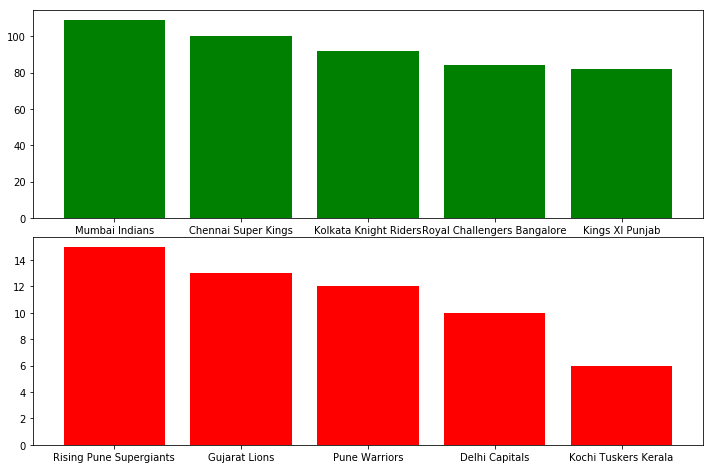

In [78]:
gridsize = (4, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0),colspan=2, rowspan=2)
# ax3 = plt.subplot2grid(gridsize, (2, 1))
ax1.bar(topteamsk, topteams, color='g')
ax2.bar(bottomteamsk, bottomteams, color='r')


## Most 'Player of the match' awards

<BarContainer object of 10 artists>

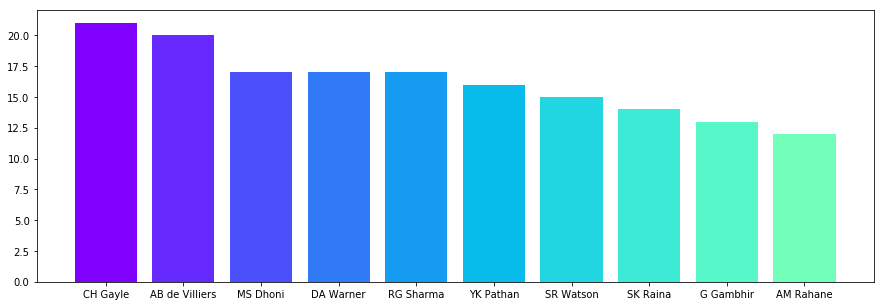

In [150]:
mostpom = list(ipl['player_of_match'].value_counts().head(10))
mostpomk = list(ipl['player_of_match'].value_counts().head(10).keys())
plt.figure(figsize=(15,5))
plt.bar(mostpomk,mostpom,color = colors)

## 2. Factors that determine match outcome

### 2.1 Win by Bowling First

In [79]:
#dataframe for wins by bowling first
bowl_first = ipl[ipl.win_by_wickets != 0]
bowl_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [80]:
bowl_first.shape

(406, 18)

406 matches out of 756 in the dataset are won when a team fielded first.

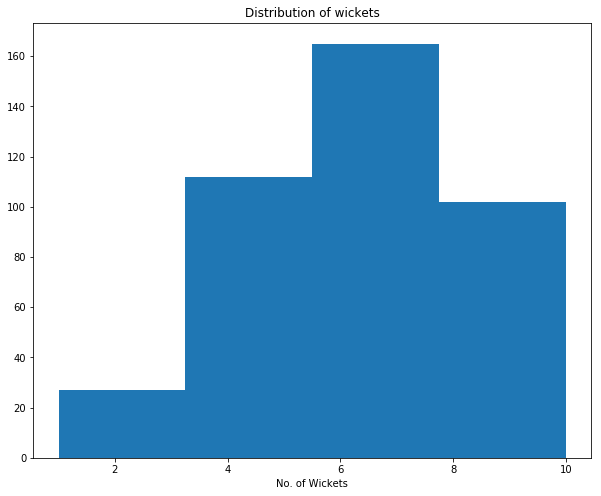

In [81]:
# ditribution of wickets
plt.figure(figsize=(10,8))
plt.hist(bowl_first['win_by_wickets'], bins=4)
plt.title('Distribution of wickets')
plt.xlabel('No. of Wickets')
plt.show()

#### Thus, Majority of the matches won by fielding first are won by more than 5-6 wickets to spare

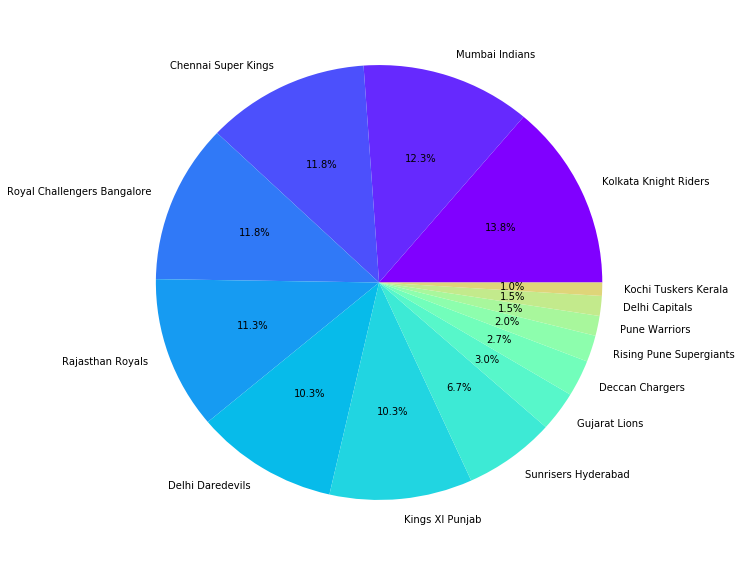

In [82]:
#Making a pie chart for distribution of most wins after fielding first
plt.figure(figsize=(10,10))
plt.pie(list(bowl_first['winner'].value_counts()),labels=list(bowl_first['winner'].value_counts().keys()),autopct='%0.1f%%', colors=colors)
plt.show()

Teams that have the most luck with bowling first are 
1. Kolkata Knight Riders
2. Mumbai Indians
3. Chennai Super Kings
4. Royal Challengers Bangalore

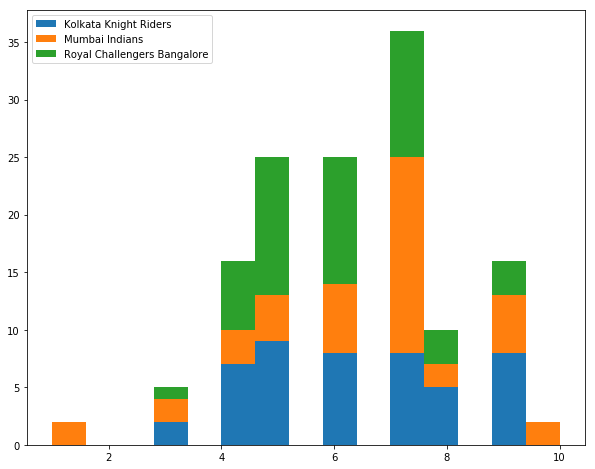

In [83]:
#distribution of wickets for top 3 teams 
plt.figure(figsize=(10,8))
plt.hist([bowl_first[bowl_first.team1 == 'Kolkata Knight Riders'].win_by_wickets, 
          bowl_first[bowl_first.team1 == 'Mumbai Indians'].win_by_wickets,
          bowl_first[bowl_first.team1 == 'Royal Challengers Bangalore'].win_by_wickets], 
         bins=15, stacked=True)
mylabels = ['Kolkata Knight Riders','Mumbai Indians','Royal Challengers Bangalore']
plt.legend(mylabels)
plt.show()

### 2.2 Win by Batting First

In [84]:
bat_first = ipl[ipl.win_by_runs != 0 ]
bat_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


In [85]:
bat_first.shape

(337, 18)

337 matches have been won after a team batted first.

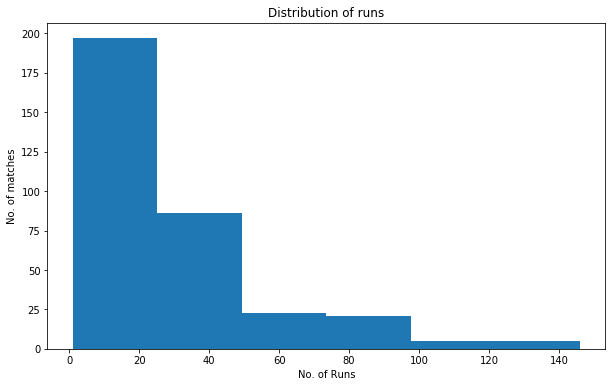

In [86]:
# Distribution of matches won by how many number of runs
plt.figure(figsize=(10,6))
plt.hist(bat_first['win_by_runs'], bins=6)
plt.title('Distribution of runs')
plt.xlabel('No. of Runs')
plt.ylabel('No. of matches')
plt.show()

#### Matches won by batting first are mostly won somewhere below 50 runs

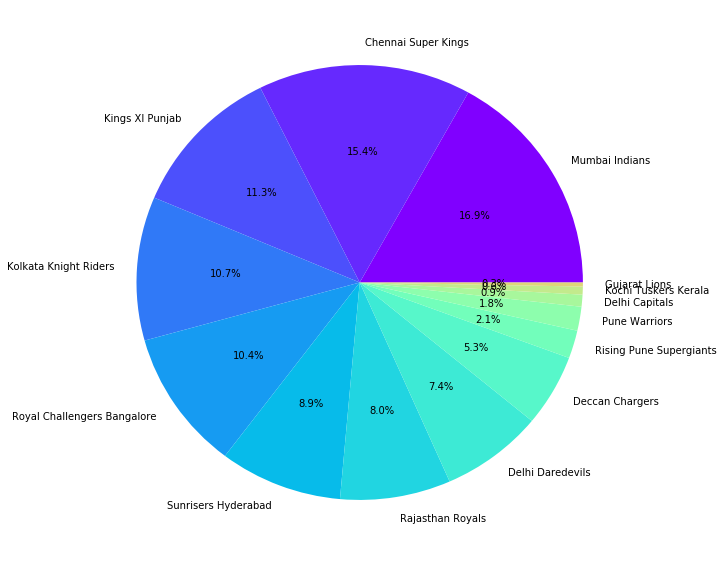

In [87]:
plt.figure(figsize=(10,10))
colors = cm.rainbow(np.linspace(0, 1, len(ipl.index[:20])))
plt.pie(list(bat_first.winner.value_counts()), labels= list(bat_first.winner.value_counts().keys()), autopct='%0.1f%%', colors=colors)
plt.show()

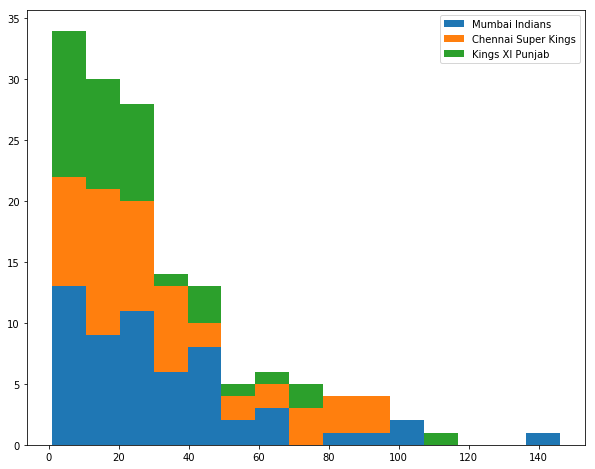

In [88]:
plt.figure(figsize=(10,8))
plt.hist([bat_first[bat_first.team1 == 'Mumbai Indians'].win_by_runs, 
          bat_first[bat_first.team1 == 'Chennai Super Kings'].win_by_runs,
          bat_first[bat_first.team1 == 'Kings XI Punjab'].win_by_runs], 
         bins=15, stacked=True)
mylabels = ['Mumbai Indians','Chennai Super Kings','Kings XI Punjab']
plt.legend(mylabels)
plt.show()

Mumbai Indians and Chennai Super Kings have had a few matches where they won with over 60 runs. This has helped with their NRR over the seasons which is an important factor if there's a close battle to the knockout playoffs.

#### From the data, we can also see that toss decisions are also provided. Let's check whether toss determines the outcome of a match

In [90]:
ipl['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

### Wins by opting to field first

In [97]:
# toss decision is field and win by bowling first means they won by wickets
field_Winners = ipl[(ipl.toss_decision == 'field') & (ipl.win_by_wickets) > 0]
field_Winners.shape

(118, 18)

In [98]:
field_Winners['winner'].value_counts()

Kolkata Knight Riders          17
Royal Challengers Bangalore    15
Rajasthan Royals               15
Mumbai Indians                 13
Delhi Daredevils               11
Chennai Super Kings            11
Kings XI Punjab                10
Sunrisers Hyderabad             9
Gujarat Lions                   6
Rising Pune Supergiants         4
Deccan Chargers                 3
Kochi Tuskers Kerala            2
Delhi Capitals                  2
Name: winner, dtype: int64

Looks like Kolkata Knight Riders have the best outcome with fielding first

### Checking KKR stats

In [99]:
kkr_wickets = field_Winners[field_Winners.winner == 'Kolkata Knight Riders']

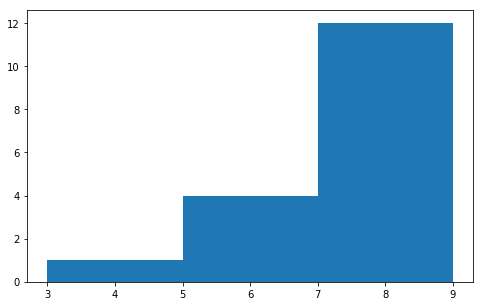

In [101]:
#Find stats for no. of wickets
noofwickets = kkr_wickets['win_by_wickets']
plt.figure(figsize=(8,5))
plt.hist(noofwickets, bins=3)
plt.show()

KKR mostly wins by 7 or more wickets.

### Win by opting to bat first

In [102]:
# here toss decision is bat and win by runs means they won with their toss decision
bat_first = ipl[(ipl.toss_decision=='bat') & (ipl.win_by_runs > 0)]
bat_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
20,21,2017,Hyderabad,2017-04-19,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,15,0,KS Williamson,"Rajiv Gandhi International Stadium, Uppal",CB Gaffaney,NJ Llong,NaN
50,51,2017,Delhi,2017-05-12,Delhi Daredevils,Rising Pune Supergiants,Delhi Daredevils,bat,normal,0,Delhi Daredevils,7,0,KK Nair,Feroz Shah Kotla,KN Ananthapadmanabhan,CK Nandan,NaN
54,55,2017,Delhi,2017-05-14,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,10,0,HV Patel,Feroz Shah Kotla,CK Nandan,C Shamshuddin,NaN


In [103]:
bat_first.winner.value_counts()

Chennai Super Kings            31
Mumbai Indians                 24
Kolkata Knight Riders          16
Rajasthan Royals               14
Delhi Daredevils               11
Deccan Chargers                11
Royal Challengers Bangalore     9
Sunrisers Hyderabad             8
Kings XI Punjab                 7
Pune Warriors                   3
Delhi Capitals                  1
Name: winner, dtype: int64

Chennai Super Kings have better luck with the bat!

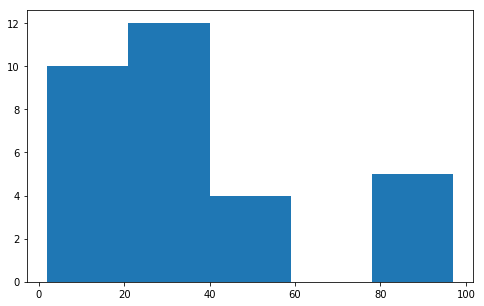

In [104]:
chennai_stats = bat_first[bat_first.winner=='Chennai Super Kings']
no_of_runs = chennai_stats['win_by_runs']
plt.figure(figsize=(8,5))
plt.hist(no_of_runs,bins=5)
plt.show()

Chennai Super Kings mostly win their matches within 40 runs

## 3. Analysing Deliveries data

In [105]:
deliveries=pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [110]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [106]:
# how the most successful fielding team dismisses batsmen

kkr = deliveries[deliveries.bowling_team=='Kolkata Knight Riders']
kkr.dismissal_kind.value_counts()

caught               561
bowled               198
run out              103
lbw                   79
stumped               44
caught and bowled     24
hit wicket             1
Name: dismissal_kind, dtype: int64

So, looks like KKR has some very impressive fielders since most of their wickets are catches.

### We can also look up some stats for famous players. Let's take Virat Kohli under the IPL radar.

In [107]:
vkohli = deliveries[deliveries.player_dismissed=='V Kohli']
vkohli.dismissal_kind.value_counts()

caught               95
bowled               30
lbw                   7
run out               6
stumped               3
caught and bowled     2
Name: dismissal_kind, dtype: int64

In [111]:
# to find which bowler is dangerous for Virat Kohli

vkohli.bowler.value_counts().head(10)

A Nehra           6
Sandeep Sharma    5
DS Kulkarni       4
MJ McClenaghan    4
S Gopal           3
Mohammed Shami    3
M Morkel          3
UT Yadav          3
Z Khan            3
L Balaji          3
Name: bowler, dtype: int64

In [112]:
# to find which teams are comparatively dangerous for Virat Kohli

vkohli.bowling_team.value_counts().head()

Mumbai Indians           21
Kings XI Punjab          21
Chennai Super Kings      20
Kolkata Knight Riders    18
Rajasthan Royals         17
Name: bowling_team, dtype: int64

### Statistics for AB  de Villiers

In [113]:
abdvilliers = deliveries[deliveries.player_dismissed=='AB de Villiers']
abdvilliers.dismissal_kind.value_counts()

caught               67
bowled               20
run out              10
stumped               6
lbw                   6
caught and bowled     1
Name: dismissal_kind, dtype: int64

In [115]:
# to find which bowler is dangerous for AB deVilliers

abdvilliers.bowler.value_counts().head(10)

PP Chawla          5
KH Pandya          4
S Gopal            4
Harbhajan Singh    3
SP Narine          3
JA Morkel          3
L Balaji           3
DS Kulkarni        2
Sandeep Sharma     2
JJ Bumrah          2
Name: bowler, dtype: int64

In [116]:
# to find which teams are potentially dangerous for AB DeVilliers

abdvilliers.bowling_team.value_counts().head()

Chennai Super Kings      19
Mumbai Indians           15
Rajasthan Royals         14
Kolkata Knight Riders    13
Kings XI Punjab          13
Name: bowling_team, dtype: int64

### Statistics for Rohit Sharma

In [117]:
rsharma = deliveries[deliveries.player_dismissed=='RG Sharma']
rsharma.dismissal_kind.value_counts()

caught               103
bowled                22
lbw                   11
run out               10
caught and bowled      6
stumped                3
Name: dismissal_kind, dtype: int64

In [118]:
# to find which bowler is dangerous for Rohit Sharma

rsharma.bowler.value_counts().head(10)

SP Narine        6
A Mishra         6
R Vinay Kumar    6
DJ Bravo         5
SK Trivedi       5
DS Kulkarni      4
UT Yadav         4
JP Faulkner      3
JA Morkel        3
SK Warne         3
Name: bowler, dtype: int64

In [119]:
# to find which teams are potentially dangerous for Rohit Sharma

rsharma.bowling_team.value_counts().head(10)

Chennai Super Kings            24
Royal Challengers Bangalore    23
Delhi Daredevils               20
Rajasthan Royals               20
Kolkata Knight Riders          18
Kings XI Punjab                18
Sunrisers Hyderabad            11
Mumbai Indians                  5
Rising Pune Supergiant          4
Pune Warriors                   4
Name: bowling_team, dtype: int64

## Super Over Statistics

In [120]:
superover = deliveries[deliveries.is_super_over == 1]
superover

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
8092,34,3,Mumbai Indians,Gujarat Lions,1,1,JC Buttler,KA Pollard,JP Faulkner,1,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8093,34,3,Mumbai Indians,Gujarat Lions,1,2,KA Pollard,JC Buttler,JP Faulkner,1,...,0,0,0,0,4,0,4,NaN,NaN,NaN
8094,34,3,Mumbai Indians,Gujarat Lions,1,3,KA Pollard,JC Buttler,JP Faulkner,1,...,0,0,0,0,6,0,6,NaN,NaN,NaN
8095,34,3,Mumbai Indians,Gujarat Lions,1,4,KA Pollard,JC Buttler,JP Faulkner,1,...,0,0,0,0,0,0,0,KA Pollard,caught,AJ Finch
8096,34,3,Mumbai Indians,Gujarat Lions,1,5,JC Buttler,RG Sharma,JP Faulkner,1,...,0,0,0,0,0,0,0,JC Buttler,caught,Ishan Kishan
8097,34,4,Gujarat Lions,Mumbai Indians,1,1,AJ Finch,BB McCullum,JJ Bumrah,1,...,0,0,1,0,0,1,1,NaN,NaN,NaN
8098,34,4,Gujarat Lions,Mumbai Indians,1,2,AJ Finch,BB McCullum,JJ Bumrah,1,...,0,1,0,0,0,1,1,NaN,NaN,NaN
8099,34,4,Gujarat Lions,Mumbai Indians,1,3,BB McCullum,AJ Finch,JJ Bumrah,1,...,0,0,0,0,0,1,1,NaN,NaN,NaN
8100,34,4,Gujarat Lions,Mumbai Indians,1,4,BB McCullum,AJ Finch,JJ Bumrah,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
8101,34,4,Gujarat Lions,Mumbai Indians,1,5,BB McCullum,AJ Finch,JJ Bumrah,1,...,1,0,0,0,0,1,1,NaN,NaN,NaN


In [121]:
superover.bowler.value_counts()

JP Faulkner       11
JJ Bumrah          8
CH Morris          7
R Vinay Kumar      7
Kamran Khan        7
UT Yadav           6
SP Narine          6
DW Steyn           6
R Rampaul          6
J Theron           5
BAW Mendis         4
MG Johnson         4
M Muralitharan     4
Name: bowler, dtype: int64

In [122]:
superover.batsman.value_counts().head()

CH Gayle       12
SE Marsh        5
SPD Smith       5
BB McCullum     5
CL White        5
Name: batsman, dtype: int64

In [123]:
superover.batting_team.value_counts()

Rajasthan Royals               14
Kolkata Knight Riders          13
Royal Challengers Bangalore    12
Kings XI Punjab                11
Gujarat Lions                   8
Sunrisers Hyderabad             7
Delhi Daredevils                6
Chennai Super Kings             5
Mumbai Indians                  5
Name: batting_team, dtype: int64

In [125]:
superover_wickets = superover[~(pd.isna(superover.player_dismissed))]
superover_wickets                    

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
8095,34,3,Mumbai Indians,Gujarat Lions,1,4,KA Pollard,JC Buttler,JP Faulkner,1,...,0,0,0,0,0,0,0,KA Pollard,caught,AJ Finch
8096,34,3,Mumbai Indians,Gujarat Lions,1,5,JC Buttler,RG Sharma,JP Faulkner,1,...,0,0,0,0,0,0,0,JC Buttler,caught,Ishan Kishan
29285,126,3,Kolkata Knight Riders,Rajasthan Royals,1,7,CH Gayle,BB McCullum,Kamran Khan,1,...,0,0,0,0,0,0,0,CH Gayle,caught,RJ Quiney
44820,190,3,Chennai Super Kings,Kings XI Punjab,1,2,ML Hayden,JA Morkel,J Theron,1,...,0,0,0,0,0,0,0,ML Hayden,bowled,NaN
44823,190,3,Chennai Super Kings,Kings XI Punjab,1,5,SK Raina,JA Morkel,J Theron,1,...,0,0,0,0,0,0,0,SK Raina,caught,DPMD Jayawardene
44825,190,4,Kings XI Punjab,Chennai Super Kings,1,2,DPMD Jayawardene,Yuvraj Singh,M Muralitharan,1,...,0,0,0,0,0,0,0,DPMD Jayawardene,caught,M Vijay
95079,401,4,Delhi Daredevils,Royal Challengers Bangalore,1,1,DA Warner,BJ Rohrer,R Rampaul,1,...,0,0,0,0,0,0,0,DA Warner,caught,CH Gayle
95084,401,4,Delhi Daredevils,Royal Challengers Bangalore,1,6,BJ Rohrer,IK Pathan,R Rampaul,1,...,0,0,0,0,0,0,0,BJ Rohrer,bowled,NaN
112912,476,3,Kolkata Knight Riders,Rajasthan Royals,1,1,SA Yadav,Shakib Al Hasan,JP Faulkner,1,...,0,1,0,0,0,1,1,SA Yadav,run out,SV Samson
112917,476,3,Kolkata Knight Riders,Rajasthan Royals,1,6,Shakib Al Hasan,MK Pandey,JP Faulkner,1,...,0,0,0,0,1,0,1,Shakib Al Hasan,run out,SV Samson


<BarContainer object of 7 artists>

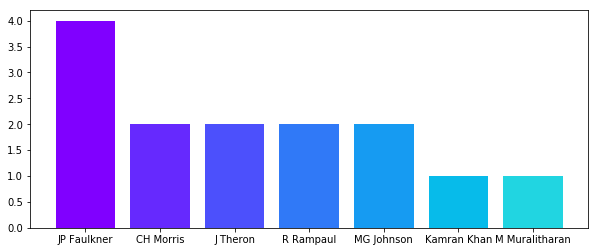

In [133]:
w = superover_wickets.bowler.value_counts()
plt.figure(figsize=(10,4))
plt.bar(list(w.keys()),list(w),color=colors)

<BarContainer object of 5 artists>

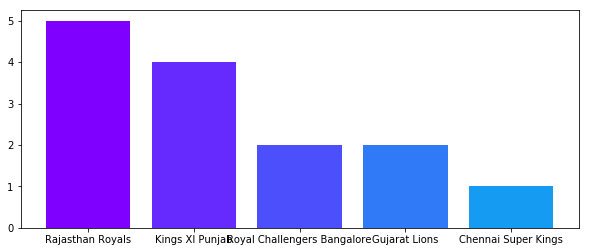

In [135]:
w = superover_wickets.bowling_team.value_counts()
plt.figure(figsize=(10,4))
plt.bar(list(w.keys()),list(w), color=colors)

## Most Fours

In [33]:
fours = deliveries[deliveries.batsman_runs == 4]
fours.batsman.value_counts().head(10)

S Dhawan      526
SK Raina      495
G Gambhir     492
V Kohli       482
DA Warner     459
RV Uthappa    436
RG Sharma     431
AM Rahane     405
CH Gayle      376
PA Patel      366
Name: batsman, dtype: int64

<BarContainer object of 10 artists>

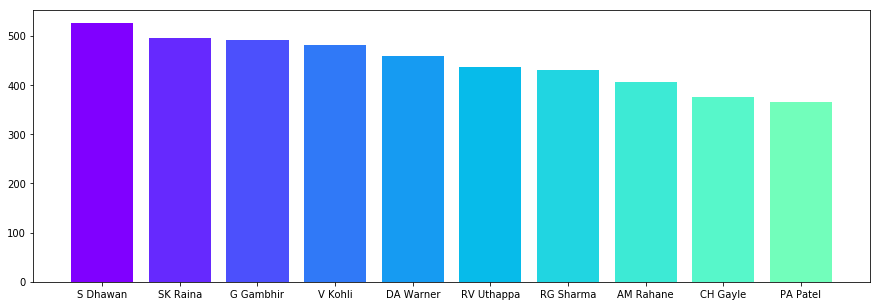

In [69]:
mostfours = list(fours['batsman'].value_counts().head(10))
mostfoursk = list(fours['batsman'].value_counts().head(10).keys())
plt.figure(figsize=(15,5))
plt.bar(mostfoursk,mostfours,color = colors)


## Most Sixes

In [41]:
sixes = deliveries[deliveries.batsman_runs == 6]
sixes.batsman.value_counts().head(10)

CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
V Kohli           191
DA Warner         181
SR Watson         177
KA Pollard        175
YK Pathan         161
Name: batsman, dtype: int64

<BarContainer object of 10 artists>

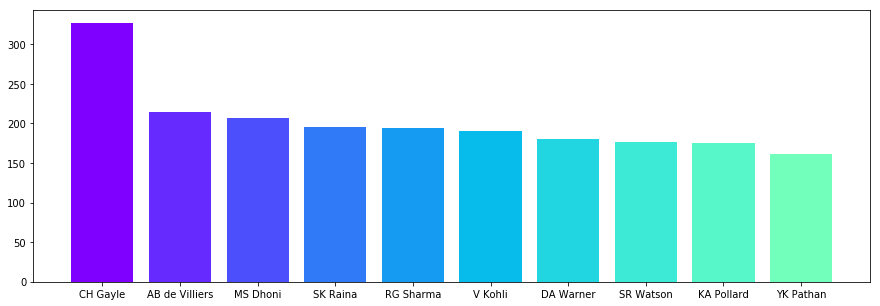

In [70]:
mostsixes = list(sixes['batsman'].value_counts().head(10))
mostsixesk = list(sixes['batsman'].value_counts().head(10).keys())
plt.figure(figsize=(15,5))
plt.bar(mostsixesk,mostsixes,color = colors)


## Most Wickets

In [49]:
wickets = deliveries[(deliveries.dismissal_kind != 'run out') & ~(pd.isna(deliveries.dismissal_kind)) ]
wickets

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN
165,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,7,3,CH Gayle,TM Head,DJ Hooda,0,...,0,0,0,0,0,0,0,CH Gayle,caught,DA Warner
206,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,5,TM Head,SR Watson,Rashid Khan,0,...,0,0,0,0,0,0,0,TM Head,caught,Yuvraj Singh
211,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,14,4,Sachin Baby,SR Watson,Bipul Sharma,0,...,0,0,0,0,0,0,0,Sachin Baby,caught,MC Henriques
230,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,17,5,STR Binny,SR Watson,B Kumar,0,...,0,0,0,0,0,0,0,STR Binny,caught,Yuvraj Singh
234,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,18,3,SR Watson,S Aravind,A Nehra,0,...,0,0,0,0,0,0,0,SR Watson,caught,MC Henriques


<BarContainer object of 10 artists>

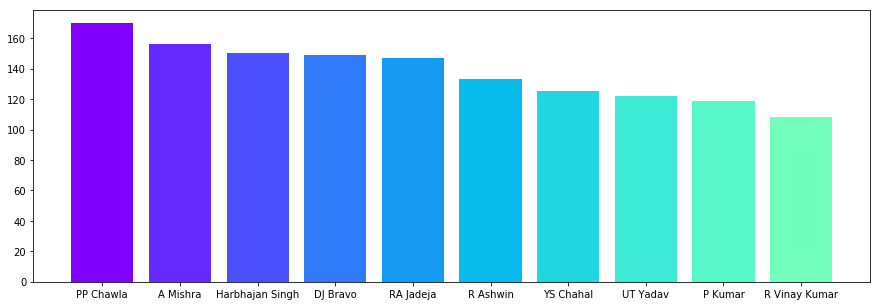

In [71]:
mostwickets = list(wickets['bowler'].value_counts().head(10))
mostwicketsk = list(sixes['bowler'].value_counts().head(10).keys())
plt.figure(figsize=(15,5))
plt.bar(mostwicketsk,mostwickets,color = colors)

## Most heated rivalry - CSK v MI

In [136]:
rivals = ipl[((ipl.team1 == 'Mumbai Indians') & (ipl.team2 == 'Chennai Super Kings')) | 
            ((ipl.team2 == 'Mumbai Indians') & (ipl.team1 == 'Chennai Super Kings'))]

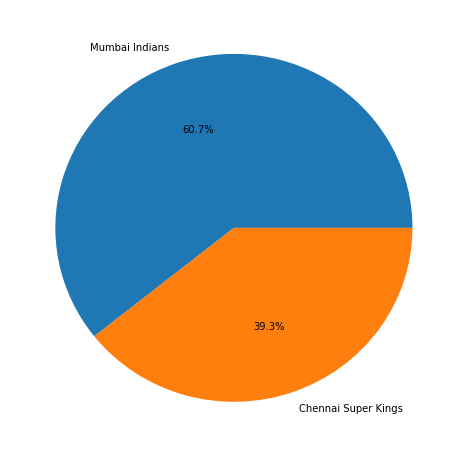

In [149]:
wins = list(rivals['winner'].value_counts())
winsk = list(rivals['winner'].value_counts().keys())
plt.figure(figsize=(8,8))
plt.pie(wins,labels = winsk, autopct='%0.1f%%')
plt.show()

In [139]:
merge_data_rivals = pd.merge(left=rivals, right=deliveries, left_on='id', right_on='match_id')
merge_data_rivals.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
1,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
5,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
7,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
8,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
9,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [148]:
merge_data_rivals.groupby('bowling_team').dismissal_kind.value_counts()

bowling_team         dismissal_kind   
Chennai Super Kings  caught               110
                     bowled                24
                     run out               15
                     lbw                   12
                     caught and bowled      3
                     stumped                2
                     retired hurt           1
Mumbai Indians       caught               110
                     bowled                26
                     lbw                   12
                     run out               11
                     caught and bowled      8
                     stumped                8
Name: dismissal_kind, dtype: int64

In [164]:
merge_data_rivals.groupby('winner').city.value_counts()

winner               city          
Chennai Super Kings  Mumbai            1214
                     Chennai            512
                     Bangalore          249
                     Port Elizabeth     242
                     Delhi              234
Mumbai Indians       Mumbai            1696
                     Chennai           1193
                     Kolkata            496
                     Hyderabad          248
                     Pune               247
                     Cape Town          244
Name: city, dtype: int64

In [152]:
merge_data_rivals[~(pd.isna(merge_data_rivals.player_dismissed))].bowler.value_counts().head(10)

SL Malinga         37
DJ Bravo           32
Harbhajan Singh    26
MM Sharma          16
RA Jadeja          13
KA Pollard         13
R Ashwin           12
PP Ojha            11
JA Morkel          11
HH Pandya           9
Name: bowler, dtype: int64

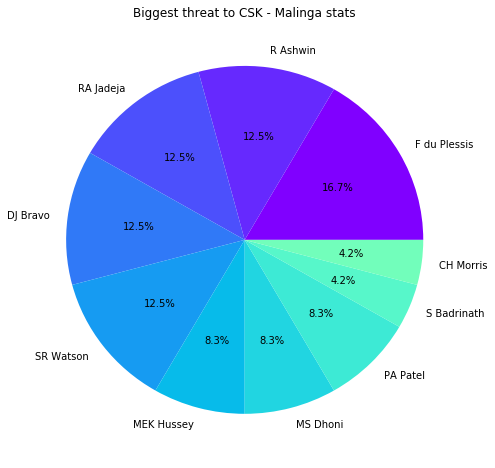

In [159]:
# Players dismissed by Malinga
malinga = merge_data_rivals[merge_data_rivals.bowler == 'SL Malinga'].player_dismissed.value_counts().head(10)
plt.figure(figsize=(8,8))
plt.pie(malinga, labels= malinga.keys(), autopct='%0.1f%%', colors=colors)
plt.title('Biggest threat to CSK - Malinga stats')
plt.show()

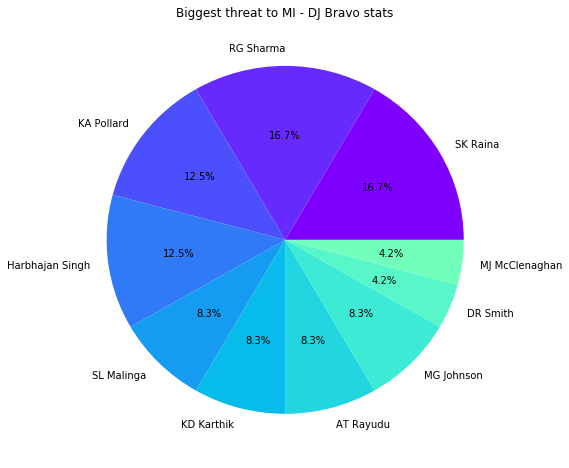

In [160]:
# Players dismissed by Bravo
bravo = merge_data_rivals[merge_data_rivals.bowler == 'DJ Bravo'].player_dismissed.value_counts().head(10)
plt.figure(figsize=(8,8))
plt.pie(bravo, labels= bravo.keys(), autopct='%0.1f%%', colors=colors)
plt.title('Biggest threat to MI - DJ Bravo stats')
plt.show()

In [162]:
deliveries[(deliveries.bowler=='DJ Bravo') & (deliveries.player_dismissed=='SK Raina')]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
22357,96,1,Chennai Super Kings,Mumbai Indians,6,5,SK Raina,SP Fleming,DJ Bravo,0,...,0,0,0,0,0,0,0,SK Raina,caught,YV Takawale
27488,118,2,Chennai Super Kings,Mumbai Indians,3,5,SK Raina,ML Hayden,DJ Bravo,0,...,0,0,0,0,0,0,0,SK Raina,caught,RR Raje
37925,162,2,Chennai Super Kings,Mumbai Indians,4,5,SK Raina,ML Hayden,DJ Bravo,0,...,0,0,0,0,0,0,0,SK Raina,caught and bowled,NaN
49772,211,1,Chennai Super Kings,Mumbai Indians,9,6,SK Raina,ML Hayden,DJ Bravo,0,...,0,0,0,0,0,0,0,SK Raina,caught,S Dhawan


Yes, SK Raina in Bravo's stats confused me too. I later discovered that Bravo had a brief stint in Mumbai Indians in the intitial seasons. 